In [1]:
from datasets import load_from_disk
from pathlib import Path
from functools import partial
import os

/home/nico/Thesis/neural-artwork-caption-generator/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
PROCESSED_DATA_DIR = Path.cwd().parent / "data" / "processed"

In [3]:
dataset = load_from_disk(PROCESSED_DATA_DIR / "captioning_dataset_augmented_processed")

In [12]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'clip_score', 'file_name', 'caption'],
        num_rows: 240381
    })
    test: Dataset({
        features: ['image', 'clip_score', 'file_name', 'captions'],
        num_rows: 17385
    })
    validation: Dataset({
        features: ['image', 'clip_score', 'file_name', 'captions'],
        num_rows: 17128
    })
})

In [4]:
def _extend_examples(examples):
    new_examples = dict((k, []) for k in examples.keys() if k != "captions")
    new_examples["caption"] = []

    for i in range(len(examples["image"])):
        for caption in examples["captions"][i]:
            for k in new_examples.keys():
                if k != "caption":
                    new_examples[k].append(examples[k][i])
                else:
                    new_examples[k].append(caption)

    return new_examples

dataset["train"] = dataset["train"].map(_extend_examples, batched=True, num_proc=4, remove_columns=["captions"])

Loading cached processed dataset at /home/nico/Thesis/neural-artwork-caption-generator/data/processed/captioning_dataset_augmented/train/cache-a33139d43ed1e5c2_*_of_00004.arrow


In [5]:
dataset["train"] = dataset["train"].shuffle(seed=42)
dataset["train"] = dataset["train"].flatten_indices()
dataset.save_to_disk(PROCESSED_DATA_DIR / "captioning_dataset_augmented_prepared")

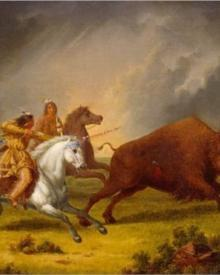

In [10]:
dataset["train"][0]["image"]